# Use of a Neural-Network for Constitutive Law

To allow inline pictures, run the following block

In [1]:
%matplotlib inline
#%matplotlib notebook

Import all the useful libraries before first run
We need here the classic ones such as:
- math
- numpy
- pandas
- matplotlib

And for the Neural Network, we also need to import parts of the keras module of TensorFlow

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the test database

Read the Test database

In [3]:
dataPath = '.'
read = np.load(dataPath + '/DatatestWithDerivatives.npz')
testData = read['testData']
nrows = testData.shape[0]

In [4]:
eps_test = testData[:,0].reshape(nrows,1)
epsp_test = testData[:,1].reshape(nrows,1)
T_test = testData[:,2].reshape(nrows,1)
sig_test = testData[:,3].reshape(nrows,1)
#eps_test, epsp_test, T_test, sig_test

 ## Load the NN parameters

In [5]:
ANN_name = '3-7-4-1-sigmoid'
NN = np.load(dataPath + '/' + ANN_name + '.npz')
for key in NN:
    print (key)

logBase
minEntries
maxEntries
w1
b1
w2
b2
w3
b3


In [6]:
w1 = NN['w1']
w2 = NN['w2']
w3 = NN['w3']
b1 = NN['b1']
b2 = NN['b2']
b3 = NN['b3']
minEntries = NN['minEntries']
maxEntries = NN['maxEntries']
rangeEntries = maxEntries - minEntries
logBase = NN['logBase']
w1, b1, w2, b2, w3, b3, minEntries, maxEntries, rangeEntries, logBase

(array([[-1.0730778e+02, -4.3804433e-02, -5.2456245e-02],
        [-1.7539887e-01,  4.1764945e-01,  1.5112149e+00],
        [-7.6213115e-01, -9.6828222e-01,  1.5302400e-01],
        [-3.2692820e-01, -4.2316213e-02, -1.4066095e+00],
        [-4.3204169e+00, -1.0370244e-01,  2.2198055e-02],
        [-1.7866945e+01,  9.5597193e-02, -5.7439613e-01],
        [-6.5998524e-01, -8.5104352e-01,  9.7938013e-01]], dtype=float32),
 array([[-0.21185565],
        [-1.8938379 ],
        [ 1.92739   ],
        [ 1.5921794 ],
        [-1.0844791 ],
        [-2.2298539 ],
        [-0.9199117 ]], dtype=float32),
 array([[ -1.7524973 ,  -0.8401686 ,  -1.4854211 ,   1.3689417 ,
          -1.695878  ,  -0.9983166 ,  -1.788714  ],
        [ -0.02897879,   0.53483295,  -0.41136816,  -1.292468  ,
           0.8173207 ,   4.234177  ,   1.2066529 ],
        [  1.9553993 ,  -1.7140672 ,  -1.7922026 ,   0.8616387 ,
          -1.5876983 ,   0.82290816,  -1.8419569 ],
        [-10.399009  ,   2.651427  ,   1.1838132

## Reshape data

In [7]:
epsp_test = np.log(epsp_test / logBase)
inputTest = (np.hstack([eps_test, epsp_test, T_test]) - np.array(minEntries)[0:3]) / np.array(rangeEntries)[0:3]
inputTest

array([[0.18462152, 0.9154158 , 0.39969273],
       [0.20210327, 0.99480029, 0.27931531],
       [0.38681659, 0.92746382, 0.37035689],
       ...,
       [0.1450195 , 0.87827839, 0.65897238],
       [0.14242315, 0.91689045, 0.48511348],
       [0.76424414, 0.8779982 , 0.71576596]])

Computes the target

In [8]:
def tanh2Layers(inputData):
    l1 = w1.dot(inputData) + b1
    f1 = np.tanh(l1)
    l2 = w2.dot(f1) + b2
    f2 = np.tanh(l2)
    sigP = w3.dot(f2) + b3
    SigmaNN = sigP * rangeEntries[3] + minEntries[3]
    return SigmaNN

In [9]:
def sigmoid2Layers(inputData):
    l1 = w1.dot(inputData) + b1
    f1 = 1/(1 + np.exp(-l1))
    l2 = w2.dot(f1) + b2
    f2 = 1/( 1 +np.exp(-l2))
    sigP = w3.dot(f2) + b3
    SigmaNN = sigP * rangeEntries[3] + minEntries[3]
    return SigmaNN

Setup data

In [10]:
inp = inputTest.T
sig = sig_test
#inp, sig

Rebuild the real $\sigma$

In [11]:
if ('tanh' in ANN_name) : SigmaNN = tanh2Layers(inp)
elif ('sigmoid' in ANN_name) : SigmaNN = sigmoid2Layers(inp)
else : SigmaNN = 0
SigmaNN

array([[1238.81841533, 1300.52909512, 1311.72337432, ..., 1114.62936488,
        1186.87904989, 1215.21054412]])

In [12]:
# Computes the error
error = np.abs(SigmaNN.T - sig)/sig
print("Min error is:", np.min(error))
print("Max error is:", np.max(error))
print("Mean error is:", np.mean(error))
errorSort = np.sort(error, axis=0)
largeErrors = errorSort[errorSort > 5/1000]
print(len(largeErrors),'/',len(error),'points have errors > 0.5%\n')

# Display info for large errors
for err in largeErrors[::-1]:
    loc = np.where(error == err)[0][0]
    print('err= %5.3f %% for eps= %5.3E, epsp= %5.3E, T= %5.2f' %(error[loc][0]*100, eps_test[loc][0], math.exp(epsp_test[loc][0]), T_test[loc][0]))

Min error is: 1.0985451532106388e-07
Max error is: 0.0016244597879503215
Mean error is: 0.0005633959184683035
0 / 5000 points have errors > 0.5%



In [13]:
levelsT = ['$> 1.00 \%$','$0.50 - 1.00 \%$','$0.25 - 0.50 \%$','$0.10 - 0.25 \%$','$< 0.10 \%$']
levelsC = [0.01, 0.005, 0.0025, 0.001]

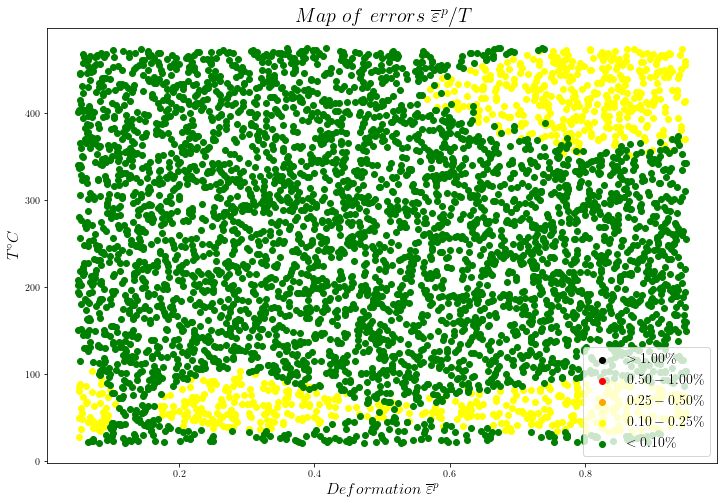

In [14]:
plt.figure(figsize = (12, 8))
plt.rc('text', usetex = True)
plt.scatter(eps_test[error >= levelsC[0]], T_test[error >= levelsC[0]], color='black', label=levelsT[0])
plt.scatter(eps_test[(error < levelsC[0]) & (error >= levelsC[1])], T_test[(error < levelsC[0]) & (error >= levelsC[1])], color='red', label=levelsT[1])
plt.scatter(eps_test[(error < levelsC[1]) & (error >= levelsC[2])], T_test[(error < levelsC[1]) & (error >= levelsC[2])], color='orange', label=levelsT[2])
plt.scatter(eps_test[(error < levelsC[2]) & (error >= levelsC[3])], T_test[(error < levelsC[2]) & (error >= levelsC[3])], color='yellow', label=levelsT[3])
plt.scatter(eps_test[error < levelsC[3]], T_test[error < levelsC[3]], color='green', label=levelsT[4])
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
plt.ylabel(r'$T^{\circ}C$', fontsize = 16)
plt.title(r'$Map\ of\ errors\ \overline{\varepsilon}^{p} / T$', fontsize = 20)
plt.show()

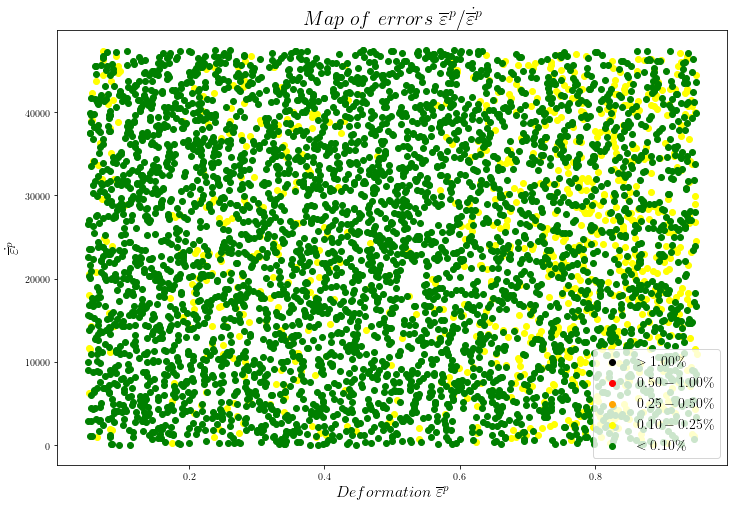

In [15]:
plt.figure(figsize = (12, 8))
plt.rc('text', usetex = True)
plt.scatter(eps_test[error >= levelsC[0]], np.exp(epsp_test[error >= levelsC[0]]), color='black', label=levelsT[0])
plt.scatter(eps_test[(error < levelsC[0]) & (error >= levelsC[1])], np.exp(epsp_test[(error < levelsC[0]) & (error >= levelsC[1])]), color='red', label=levelsT[1])
plt.scatter(eps_test[(error < levelsC[1]) & (error >= levelsC[2])], np.exp(epsp_test[(error < levelsC[1]) & (error >= levelsC[2])]), color='orange', label=levelsT[2])
plt.scatter(eps_test[(error < levelsC[2]) & (error >= levelsC[3])], np.exp(epsp_test[(error < levelsC[2]) & (error >= levelsC[3])]), color='yellow', label=levelsT[3])
plt.scatter(eps_test[error < levelsC[3]], np.exp(epsp_test[error < levelsC[3]]), color='green', label=levelsT[4])
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
plt.ylabel(r'$\dot{\overline{\varepsilon}^{p}}$', fontsize = 16)
plt.title(r'$Map\ of\ errors\ \overline{\varepsilon}^{p} / \dot{\overline{\varepsilon}^{p}}$', fontsize = 20)
plt.show()

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


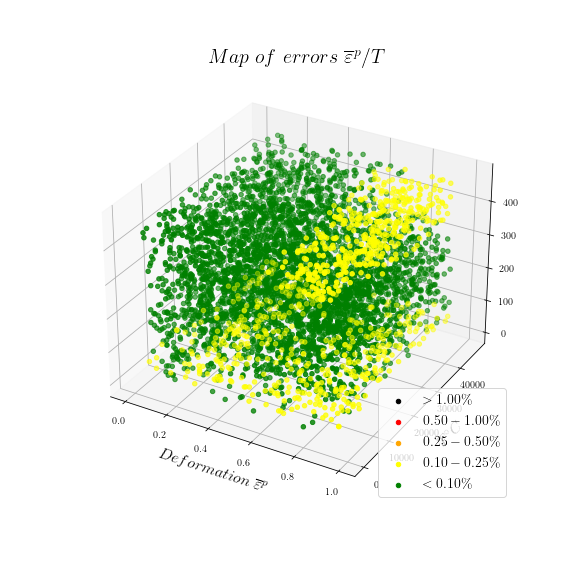

In [17]:
fig = plt.figure(figsize = (8, 8))
plt.rc('text', usetex = True)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps_test[error >= levelsC[0]], np.exp(epsp_test[error >= levelsC[0]]), T_test[error >= levelsC[0]], color='black', label=levelsT[0])
ax.scatter(eps_test[(error < levelsC[0]) & (error >= levelsC[1])], np.exp(epsp_test[(error < levelsC[0]) & (error >= levelsC[1])]), T_test[(error < levelsC[0]) & (error >= levelsC[1])], color='red', label=levelsT[1])
ax.scatter(eps_test[(error < levelsC[1]) & (error >= levelsC[2])], np.exp(epsp_test[(error < levelsC[1]) & (error >= levelsC[2])]), T_test[(error < levelsC[1]) & (error >= levelsC[2])], color='orange', label=levelsT[2])
ax.scatter(eps_test[(error < levelsC[2]) & (error >= levelsC[3])], np.exp(epsp_test[(error < levelsC[2]) & (error >= levelsC[3])]), T_test[(error < levelsC[2]) & (error >= levelsC[3])], color='yellow', label=levelsT[3])
ax.scatter(eps_test[error < levelsC[3]], np.exp(epsp_test[error < levelsC[3]]), T_test[error < levelsC[3]], color='green', label=levelsT[4])
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
plt.ylabel(r'$T^{\circ}C$', fontsize = 16)
plt.title(r'$Map\ of\ errors\ \overline{\varepsilon}^{p} / T$', fontsize = 20)
plt.show()

In [18]:
loc = np.argmin(error)
loc = 200
dx = 1e-6
inp = np.array([testData[loc,0], testData[loc,1], testData[loc,2]])
sig = testData[loc,3]
sigEps = testData[loc,4]
sigEpsp = testData[loc,5]
sigT = testData[loc,6]

In [19]:
inp, loc

(array([7.54237492e-01, 4.71576189e+04, 2.46998038e+02]), 200)

In [20]:
inp0 = inp.copy()
inp = np.vstack([inp,inp0 + [[dx,0,0]]])
inp = np.vstack([inp,inp0 + [[0,dx,0]]])
inp = np.vstack([inp,inp0 + [[0,0,dx]]])
inp

array([[7.54237492e-01, 4.71576189e+04, 2.46998038e+02],
       [7.54238492e-01, 4.71576189e+04, 2.46998038e+02],
       [7.54237492e-01, 4.71576189e+04, 2.46998038e+02],
       [7.54237492e-01, 4.71576189e+04, 2.46998039e+02]])

In [21]:
for i in range(4): inp[i,1] = np.log(inp[i,1]/logBase)
inp

array([[  0.75423749,  10.76125086, 246.99803754],
       [  0.75423849,  10.76125086, 246.99803754],
       [  0.75423749,  10.76125086, 246.99803754],
       [  0.75423749,  10.76125086, 246.99803854]])

In [22]:
inp = (inp - minEntries[0:3]) / rangeEntries[0:3]
inp

array([[0.75423749, 0.9945907 , 0.47291258],
       [0.75423849, 0.9945907 , 0.47291258],
       [0.75423749, 0.9945907 , 0.47291258],
       [0.75423749, 0.9945907 , 0.47291258]])

In [23]:
if ('tanh' in ANN_name) : SigmaNN = tanh2Layers(inp.T)
elif ('sigmoid' in ANN_name) : SigmaNN = sigmoid2Layers(inp.T)
else : SigmaNN = 0
SigmaNN

array([[1336.63667956, 1336.63680326, 1336.63667956, 1336.63667864]])

In [24]:
SigmaNN[0][0], sig, abs((SigmaNN[0][0] - sig)/sig)

(1336.6366795561971, 1336.5738419673871, 4.701392982336354e-05)

In [25]:
sigEpsN = (SigmaNN[0][1]-SigmaNN[0][0])/dx
sigEpsN, sigEps, abs((sigEpsN - sigEps)/sigEps)

(123.70287277008174, 125.27782530401564, 0.012571678428420266)

In [26]:
sigEpspN = (SigmaNN[0][2]-SigmaNN[0][0])/dx
sigEpspN, sigEpsp, abs((sigEpspN - sigEpsp)/sigEpsp)

(0.00022714630176778883, 0.00023020229807541333, 0.013275264118446668)

In [27]:
sigTN = (SigmaNN[0][3]-SigmaNN[0][0])/dx
sigTN, sigT, abs((sigTN- sigT)/sigT)

(-0.9189552656607702, -0.9124268148571577, 0.0071550404890660425)

## Dérivation directe

In [27]:
x = inp[0].reshape(3,1)
x

array([[0.75423749],
       [0.9945907 ],
       [0.47291258]])

In [28]:
def tanhPrime2Layers(x):
    w3v = w3.reshape(w3.shape[1],1)
    tanhx = np.tanh(w1.dot(x) + b1)
    p2 = w3v * (1 - np.tanh(w2.dot(tanhx) + b2)**2)
    p3 = (w2.T).dot(p2)
    p5 = p3 * (1 - tanhx**2)
    s = (w1.T).dot(p5)
    return s

In [29]:
def sigmoidPrime2Layers(x):
    w3v = w3.reshape(w3.shape[1],1)
    expx = np.exp(-(w1.dot(x) + b1))
    exp2 = np.exp(w2.dot(1/(1 + expx)) + b2)
    p1 = w3v*(exp2 / (1 + exp2)**2)
    p2 = expx / (1 + expx)**2
    s = (w1.T).dot((w2.T).dot(p1) * p2)
    return s

In [30]:
if ('tanh' in ANN_name) : s = tanhPrime2Layers(x)
elif ('sigmoid' in ANN_name) : s = sigmoidPrime2Layers(x)
else : s = 0
s

array([[ 0.13206129],
       [ 0.11935434],
       [-0.44742124]])

In [33]:
scaleOut = np.array([[rangeEntries[3]/rangeEntries[0]],[rangeEntries[3]/rangeEntries[1]],[rangeEntries[3]/rangeEntries[2]]])
#scaleOut = np.array([[rangeEntries[3]/rangeEntries[0]],[rangeEntries[3]/(rangeEntries[1]*testData[loc,1])],[rangeEntries[3]/rangeEntries[2]]])
scaleOut

array([[977.55571504],
       [ 90.34895996],
       [  2.03657441]])

In [32]:
scaled = s*scaleOut
scaled

array([[129.09726514],
       [ 10.78354015],
       [ -0.91120664]])

In [33]:
sigEpsNN = scaled[0][0]
print(sigEpsNN)
print('Num : ',sigEpsN, abs((sigEpsNN-sigEpsN)/sigEpsN))
print('Ana : ',sigEps, abs((sigEpsNN-sigEps)/sigEps))

129.0972651362092
Num :  129.0971745220304 7.01906754531719e-07
Ana :  125.27782530401564 0.030487756495810793


In [34]:
sigEpspNN = scaled[1][0]/testData[loc,1]
print(sigEpspNN)
print('Num : ',sigEpspN, abs((sigEpspNN-sigEpspN)/sigEpspN))
print('Ana : ',sigEpsp, abs((sigEpspNN-sigEpsp)/sigEpsp))

0.0002286701574904193
Num :  0.00022873791749589145 0.00029623425015824924
Ana :  0.00023020229807541333 0.006655626802179475


In [35]:
sigTNN = scaled[2][0]
print(sigTNN)
print('Num : ',sigTN, abs((sigTNN-sigTN)/sigTN))
print('Ana : ',sigT, abs((sigTNN-sigT)/sigT))

-0.911206637759443
Num :  -0.9112065981753403 4.3441413551686086e-08
Ana :  -0.9124268148571577 0.0013372876353987201


In [32]:
if ('tanh' in ANN_name) : sp = tanhPrime2Layers(inputTest.T)
elif ('sigmoid' in ANN_name) : sp = sigmoidPrime2Layers(inputTest.T)
else : sp = 0
sp

array([[ 0.41359866,  0.40149622,  0.2326184 , ...,  0.46499925,
         0.50400763,  0.11360773],
       [ 0.11135063,  0.11660113,  0.11842205, ...,  0.09999683,
         0.10612137,  0.10900537],
       [-0.39661697, -0.38291346, -0.41231909, ..., -0.41598111,
        -0.40138272, -0.46844966]])

In [38]:
ss = sp*scaleOut
error = np.abs((ss[0,:] - testData[:,4]) / testData[:,4])
"EPS", error.max(), error.min(), error.mean()

('EPS', 0.12575644274192294, 2.6684809896528993e-06, 0.029379216590844692)

In [35]:
nnvals = ss[1]/testData[:,1]
error = np.abs((nnvals - testData[:,5]) / testData[:,5])
"EPSP", error.max(), error.min(), error.mean()

('EPSP', 0.029760335985273455, 8.815248796748832e-07, 0.007328566626355666)

In [36]:
nnvals = ss[2]
error = np.abs((nnvals - testData[:,6]) / testData[:,6])
"T", error.max(), error.min(), error.mean()

('T', 0.3653047271033165, 1.6505843094870317e-05, 0.01576822589540323)

In [70]:
levelsT = ['$> 5.00 \%$','$3.00 - 5.00 \%$','$1.00 - 3.00 \%$','$0.50 - 1.00 \%$','$< 0.50 \%$']
levelsC = [0.05, 0.03, 0.01, 0.005]

<IPython.core.display.Javascript object>


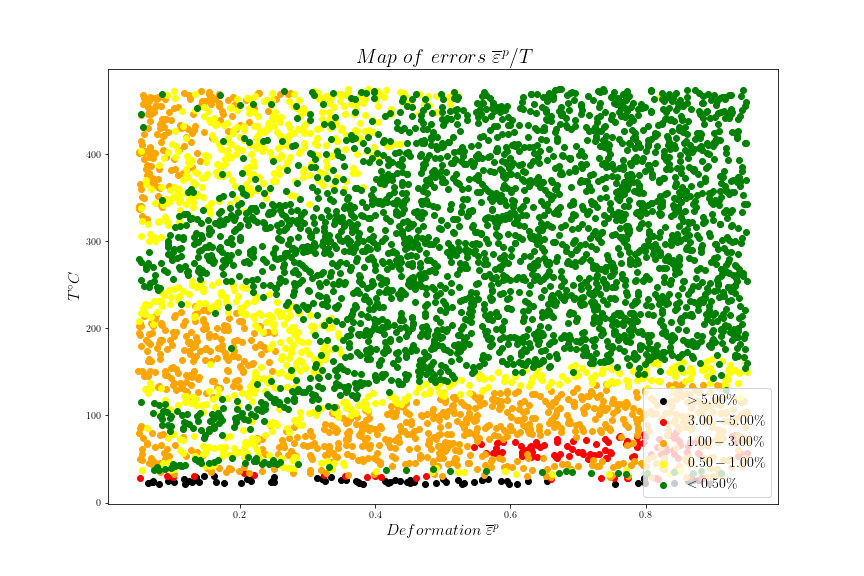

In [71]:
plt.figure(figsize = (12, 8))
plt.rc('text', usetex = True)
plt.scatter(eps_test[error >= levelsC[0]], T_test[error >= levelsC[0]], color='black', label=levelsT[0])
plt.scatter(eps_test[(error < levelsC[0]) & (error >= levelsC[1])], T_test[(error < levelsC[0]) & (error >= levelsC[1])], color='red', label=levelsT[1])
plt.scatter(eps_test[(error < levelsC[1]) & (error >= levelsC[2])], T_test[(error < levelsC[1]) & (error >= levelsC[2])], color='orange', label=levelsT[2])
plt.scatter(eps_test[(error < levelsC[2]) & (error >= levelsC[3])], T_test[(error < levelsC[2]) & (error >= levelsC[3])], color='yellow', label=levelsT[3])
plt.scatter(eps_test[error < levelsC[3]], T_test[error < levelsC[3]], color='green', label=levelsT[4])
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
plt.ylabel(r'$T^{\circ}C$', fontsize = 16)
plt.title(r'$Map\ of\ errors\ \overline{\varepsilon}^{p} / T$', fontsize = 20)
plt.show()

<IPython.core.display.Javascript object>


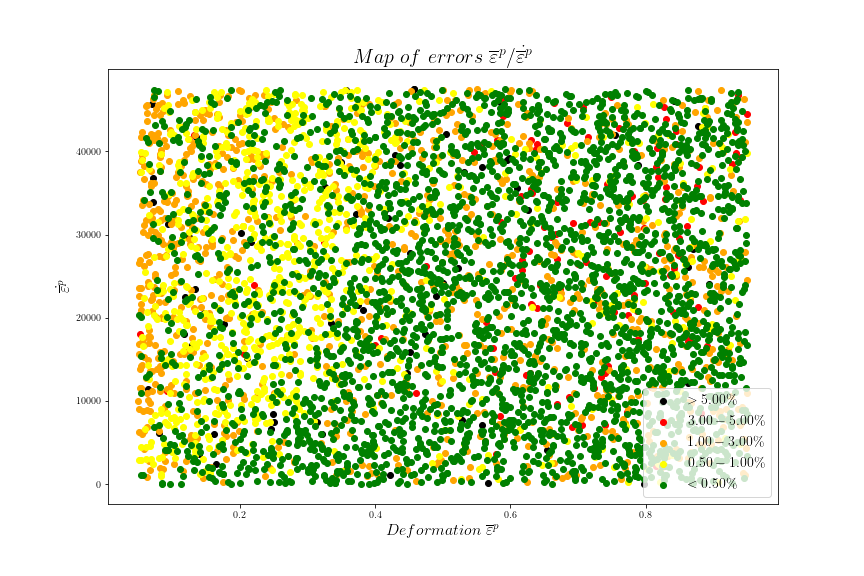

In [72]:
plt.figure(figsize = (12, 8))
plt.rc('text', usetex = True)
plt.scatter(eps_test[error >= levelsC[0]], np.exp(epsp_test[error >= levelsC[0]]), color='black', label=levelsT[0])
plt.scatter(eps_test[(error < levelsC[0]) & (error >= levelsC[1])], np.exp(epsp_test[(error < levelsC[0]) & (error >= levelsC[1])]), color='red', label=levelsT[1])
plt.scatter(eps_test[(error < levelsC[1]) & (error >= levelsC[2])], np.exp(epsp_test[(error < levelsC[1]) & (error >= levelsC[2])]), color='orange', label=levelsT[2])
plt.scatter(eps_test[(error < levelsC[2]) & (error >= levelsC[3])], np.exp(epsp_test[(error < levelsC[2]) & (error >= levelsC[3])]), color='yellow', label=levelsT[3])
plt.scatter(eps_test[error < levelsC[3]], np.exp(epsp_test[error < levelsC[3]]), color='green', label=levelsT[4])
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
plt.ylabel(r'$\dot{\overline{\varepsilon}^{p}}$', fontsize = 16)
plt.title(r'$Map\ of\ errors\ \overline{\varepsilon}^{p} / \dot{\overline{\varepsilon}^{p}}$', fontsize = 20)
plt.show()

<IPython.core.display.Javascript object>


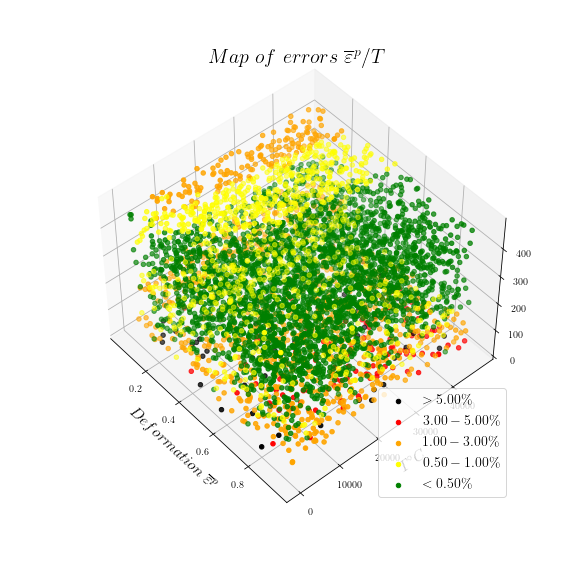

In [73]:
fig = plt.figure(figsize = (8, 8))
plt.rc('text', usetex = True)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps_test[error >= levelsC[0]], np.exp(epsp_test[error >= levelsC[0]]), T_test[error >= levelsC[0]], color='black', label=levelsT[0])
ax.scatter(eps_test[(error < levelsC[0]) & (error >= levelsC[1])], np.exp(epsp_test[(error < levelsC[0]) & (error >= levelsC[1])]), T_test[(error < levelsC[0]) & (error >= levelsC[1])], color='red', label=levelsT[1])
ax.scatter(eps_test[(error < levelsC[1]) & (error >= levelsC[2])], np.exp(epsp_test[(error < levelsC[1]) & (error >= levelsC[2])]), T_test[(error < levelsC[1]) & (error >= levelsC[2])], color='orange', label=levelsT[2])
ax.scatter(eps_test[(error < levelsC[2]) & (error >= levelsC[3])], np.exp(epsp_test[(error < levelsC[2]) & (error >= levelsC[3])]), T_test[(error < levelsC[2]) & (error >= levelsC[3])], color='yellow', label=levelsT[3])
ax.scatter(eps_test[error < levelsC[3]], np.exp(epsp_test[error < levelsC[3]]), T_test[error < levelsC[3]], color='green', label=levelsT[4])
plt.legend(loc = 'lower right',fancybox = True, numpoints = 1, fontsize = 14)
plt.xlabel(r'$Deformation\ \overline{\varepsilon}^{p}$', fontsize = 16)
plt.ylabel(r'$T^{\circ}C$', fontsize = 16)
plt.title(r'$Map\ of\ errors\ \overline{\varepsilon}^{p} / T$', fontsize = 20)
plt.show()